<div>  
    <center> <h1> Credit card fraud detection </h1>
        <h3>Dr. Hugo Bacard </h3>
    </center>
</div>

In this project we build a Machine Learning model that detects whether a credit card transaction is fraudulent or legit.
Our dataset is a csv file found on <a href= "https://www.kaggle.com/mlg-ulb/creditcardfraud"> Kaggle</a>. As eplained on Kaggle, the true nature of the column names is not known for confidentiality and for security reasons.
This file contains a column "Class" that gives the nature of transaction : 0 corresponds to a legit transaction and 1 corresponds to a fraudulent transaction.

In [1]:
# Importing different libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the csv file in Pandas : create a DataFrame.
# Make sure you've downloaded the csv file and place it in your working directory
df = pd.read_csv("./data/creditcard.csv")

# Data exploration

In [3]:
# Listing the first 5 rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Listing the last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Getting info about the different types of the columns in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Note :** No missing data. We have 284 807 rows and 31 columns. The first 30 columns are numeric values and the last column are natural numbers (0 or 1). The column "Class" gives the nature of the transaction.

$0 \rightarrow $ legit transaction.

$1 \rightarrow $ fraudulent transaction.


## Distribution of transactions by category

In [6]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

As we can see, the majority of dataset consists of legit transactions. 

There are 284315 legit transactions and 492 fraudulent transactions.
The percentage of legit transactions is: 99.8%
The percentage of fraudulent transactions is: 0.2%



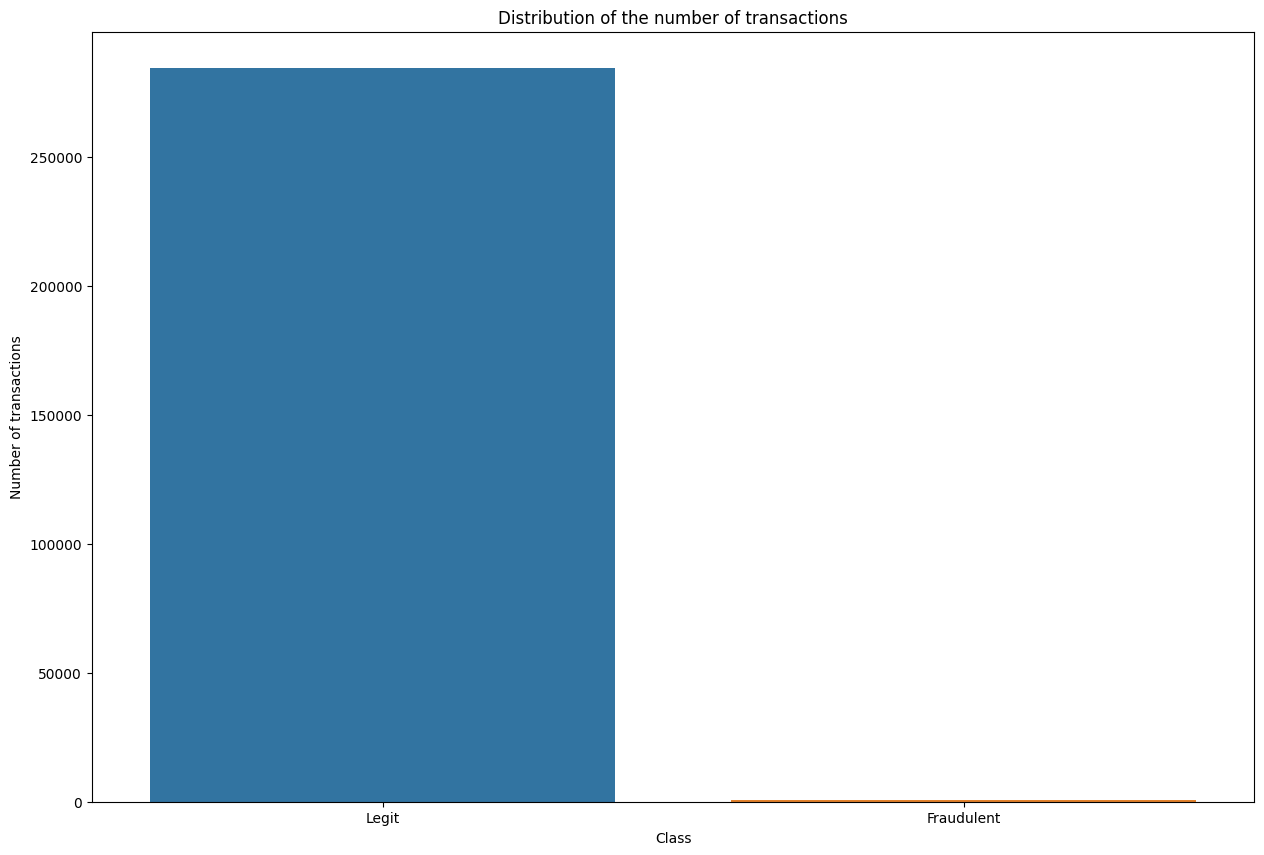

In [7]:
# Separating the dataframe by transaction type
df_legit = df[df.Class == 0].copy()  # We copy because we don't want to accidently modify the dataset
                                        #Warning ... costs in memory though!
df_fraud = df[df.Class == 1].copy()

percentage_legit = round(100*len(df_legit)/len(df),1) # percentage of legit (= normal) transactions
percentage_fraud = round(100*len(df_fraud)/len(df),1) # percentage of fraudulent transaction
print(f"There are {len(df_legit)} legit transactions and {len(df_fraud)} fraudulent transactions.")
print(f"The percentage of legit transactions is: {percentage_legit}%")
print(f"The percentage of fraudulent transactions is: {percentage_fraud}%")
print()

# Illustrating the distribution of number of transactions by category
plt.figure(figsize=(15,10))
sns.countplot(x = "Class", data= df)
plt.title("Distribution of the number of transactions")
plt.xticks([0,1],["Legit", "Fraudulent"], rotation = 0)
plt.ylabel("Number of transactions")
plt.show()

**As we can see this dataset is highly unbalanced.**

**Note :** We must be careful when we will build our model since the majority of the dataset consists of legit transactions. If we train the model with the whole dataset, then there is a potential bias since our model would have seen a majority of legit transactions and very few fraudulent transactions. We must use a specific method (undersampling) to train our model (see below).

### Statistics about the dataset

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Statistical data by category

In [9]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


##### Statistics about the Amount column by category

In [10]:
# For legit transactions
df_legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# For fraudulent transactions
df_fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Correlation between variables

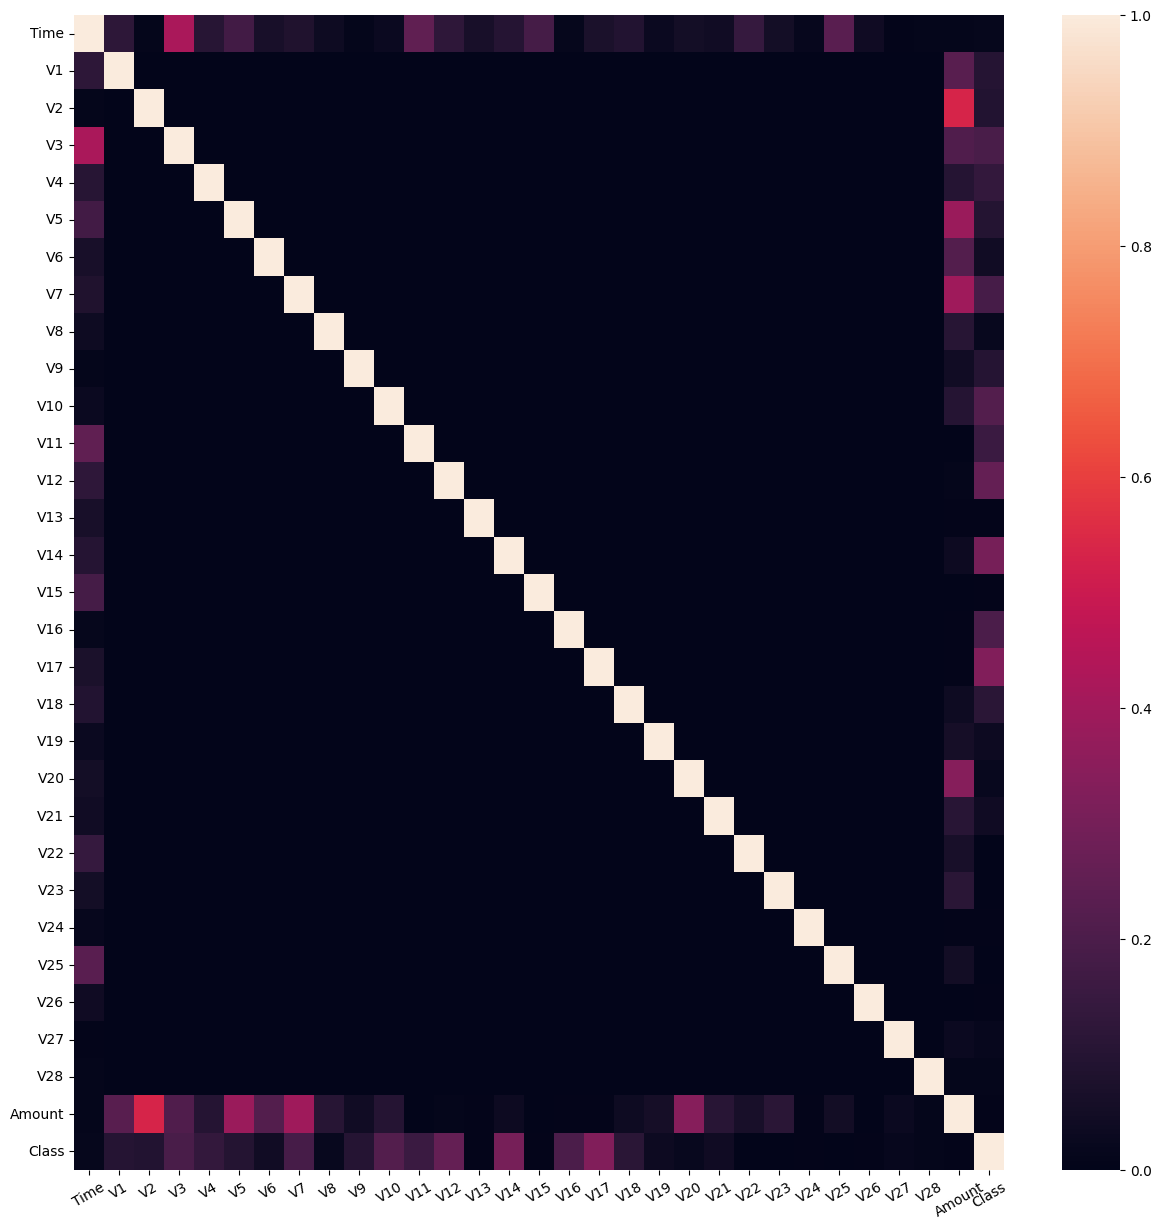

In [12]:
# Looking for a correlation between our target variable "Class" and the other variables
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().abs()) 
plt.xticks(rotation=30)
plt.show()

**Note :** As we can see on the heatmap above, we have some correlations between *Class* and the following variables: $V3, V7, V10, V11, V14, V16, V17$. We could use these columns to train our model for better improvement.

### Plotting variables that are correlated with the "Class" column

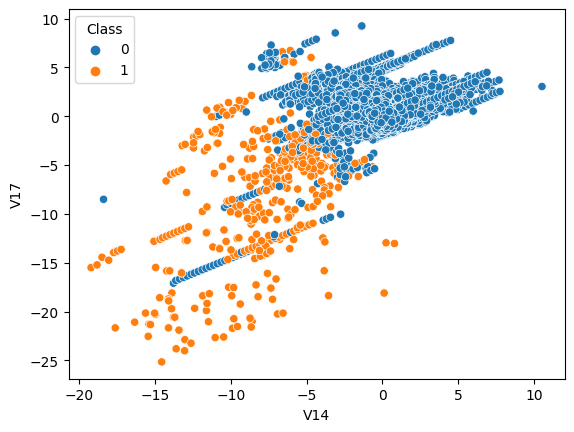

In [13]:
# V14 and V17 with hue= Class
sns.scatterplot(x = "V14", y="V17", data= df, hue= "Class")
plt.show()

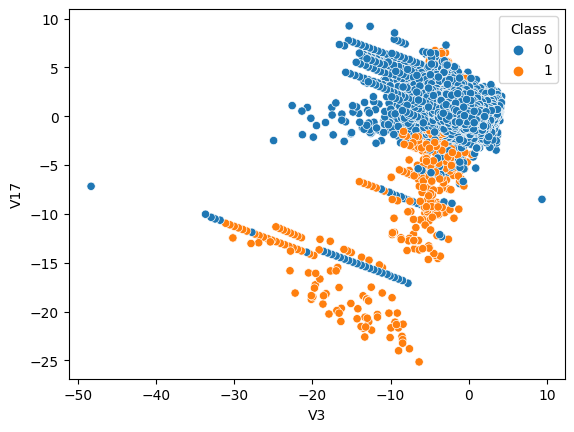

In [14]:
# V3 and V17 with hue= Class
sns.scatterplot(x = "V3", y="V17", data= df, hue= "Class")
plt.show()

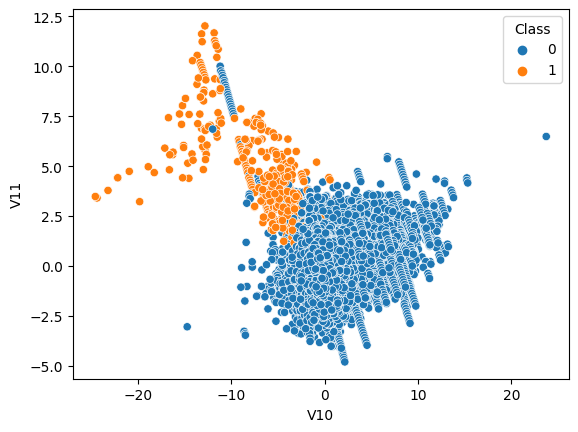

In [15]:
# V10 and V11 with hue= Class
sns.scatterplot(x = "V10", y="V11", data= df, hue= "Class")
plt.show()

# Step 2 : Constructing our machine learning model

## Resampling

Our goal is to build a new dataset which is more balanced before training our model.
As of now we only have 492 fraudulent transactions.

## Importing Scikit-learn and the dependencies

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import mlflow
from mlflow.models.signature import infer_signature



In [17]:
X = df_fraud.drop("Class", axis=1).copy()
size_augmentation = len(df_fraud) // 2
kmeans_fraud = KMeans(n_clusters=size_augmentation, random_state=43, n_init='auto')

kmeans_fraud.fit(X)


KMeans(n_clusters=246, n_init='auto', random_state=43)

In [18]:
augmentation_fraud_kmeans = pd.DataFrame(kmeans_fraud.cluster_centers_, columns=X.columns)
augmentation_fraud_kmeans["Class"] = 1
augmentation_fraud_kmeans = augmentation_fraud_kmeans.drop_duplicates()
print(augmentation_fraud_kmeans.shape)
augmentation_fraud_kmeans.head()

(246, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,95593.500000,-16.913780,12.093459,-19.388962,10.827380,-13.076933,-0.807158,-23.284952,-5.541273,-8.220706,...,-4.927230,1.058518,1.617100,0.341707,-1.443819,-0.515678,-2.982384,-0.470419,1.630000,1
1,40909.666667,-2.673751,3.710103,-5.295475,4.409444,-2.985884,-1.655968,-5.981378,0.347865,-3.239407,...,2.241367,-0.185403,-0.049038,-0.008308,0.332770,-0.085526,1.319695,0.582291,37.950000,1
2,148052.000000,-0.187602,2.636058,-5.587950,5.478726,2.076822,-2.041243,-1.251523,0.434514,-3.177818,...,0.308400,-0.653655,-0.178442,-0.058099,0.175659,0.105422,0.549218,0.240379,0.795000,1
3,8483.200000,-0.694538,3.602730,-5.781383,4.841478,-1.012162,-2.561175,-3.557101,1.041239,-1.977259,...,0.659401,-0.250375,0.000094,-0.051444,-0.216112,0.362591,0.741557,0.360332,1.000000,1
4,68228.428571,-11.131917,10.880985,-8.336004,2.973729,-4.320016,4.886222,-16.174690,-32.016784,-0.349948,...,23.252623,-7.691382,4.547782,-0.448199,0.300925,-0.139410,1.099743,0.810267,3.655714,1


In [19]:
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [20]:
augmentation_fraud_kmeans.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,...,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0
mean,84602.290207,-3.604224,2.454467,-5.398712,3.822082,-2.193192,-1.015305,-3.872215,0.152228,-2.017346,...,0.371783,0.131723,-0.118415,-0.145937,-0.033157,0.038289,0.253836,0.028834,195.784002,1.0
std,48249.438168,5.293960,3.654088,5.864962,2.694446,4.128217,1.569569,5.929008,4.689460,2.118209,...,2.500131,1.036825,1.682732,0.477496,0.693368,0.441355,1.068112,0.486489,337.219567,0.0
min,406.000000,-29.200304,-7.196980,-30.013716,-1.313275,-21.225845,-5.566870,-37.060311,-32.016784,-11.126624,...,-16.922016,-7.691382,-19.254328,-2.028024,-4.781606,-1.125881,-4.950022,-1.796363,0.000000,1.0
25%,44722.291667,-4.429706,0.744699,-6.361879,1.840934,-3.266115,-2.023633,-4.706123,-0.324912,-3.048877,...,-0.003275,-0.295225,-0.281345,-0.413679,-0.269989,-0.262946,-0.037170,-0.129820,2.225000,1.0
50%,77019.250000,-1.997524,1.844497,-4.033040,3.276962,-1.133348,-0.983087,-2.168519,0.360259,-1.692368,...,0.530371,0.091210,-0.026651,-0.146191,0.034896,-0.003806,0.326033,0.121440,41.300000,1.0
75%,131820.500000,-0.521666,3.308790,-1.769531,5.162356,0.105525,-0.113670,-0.694615,1.162292,-0.678809,...,0.933542,0.549807,0.335759,0.178584,0.321056,0.333998,0.723986,0.303471,250.940000,1.0
max,170348.000000,2.091900,19.167239,2.250210,11.916841,5.177663,4.886222,5.802537,19.168317,3.353525,...,23.252623,5.703684,4.547782,1.091435,2.103861,1.246604,3.052358,1.470321,2125.870000,1.0


In [21]:
df_fraud_augmented = pd.concat([df_fraud, augmentation_fraud_kmeans], axis=0).reset_index(drop=True).drop_duplicates()

In [22]:
df_fraud.sample(frac=0.1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251477,155359.0,-1.067713,5.262312,-8.438567,7.316487,0.008254,-2.125936,-3.307036,1.869838,-4.522584,...,0.547790,-0.491960,0.055914,-1.145369,0.068951,0.535055,0.539263,0.124255,0.77,1
189701,128519.0,-4.599447,2.762540,-4.656530,5.201403,-2.470388,-0.357618,-3.767189,0.061466,-1.836200,...,1.581480,0.261333,0.621415,0.994110,-0.687853,-0.337531,-1.612791,1.231425,93.35,1
234705,148074.0,-2.219219,0.727831,-5.458230,5.924850,3.932464,-3.085984,-1.677870,0.865075,-3.177260,...,0.417472,-0.817343,-0.028752,0.025723,-0.825835,-0.013089,0.413291,-0.131387,0.00,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
203700,134928.0,1.204934,3.238070,-6.010324,5.720847,1.548400,-2.321064,-0.781880,0.076619,-2.976249,...,0.098341,-0.845866,-0.031228,0.421146,0.388361,0.056035,0.491828,0.340847,0.00,1
12070,20931.0,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.00,1
42674,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52,1
95534,65358.0,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,...,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,31.91,1
116404,74262.0,-2.250535,2.365755,-2.955491,0.089791,-2.830745,-0.844462,-0.174062,-0.407138,0.174216,...,0.256560,-0.466245,0.291105,0.242567,-1.279094,-1.123534,-0.630977,0.326839,311.28,1
15166,26523.0,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,...,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99,1


In [23]:
df_fraud_augmented.shape

(717, 31)

In [24]:
# Custom pipeline class for preprocessing 
class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, target, size_legit_sample: int = 500, seed: int = 57):
        super().__init__()
        self.target = target
        self.size_legit_sample = size_legit_sample
        self.seed = seed

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # apply necessary transformations
        X_transformed = X.copy()
        X_legit_sample = X_transformed[X_transformed.Class == 0].sample(n=self.size_legit_sample, random_state=self.seed)
        X_fraud_data = X_transformed[X_transformed.Class == 1] # or do some data augmentation here
        
        return pd.concat([X_legit_sample, X_fraud_data], axis=0)


class DataAugmentation(BaseEstimator, TransformerMixin):
    def __init__(self, target, n_sample_legit: int, n_augmentation_fraud: int = 200, seed: int = 57):
        super().__init__()
        self.target = target
        self.n_sample_legit = n_sample_legit
        self.n_augmentation_faud = n_augmentation_fraud
        self.seed = seed

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_transformed = X.copy()
        
        X_transformed_fraud = X_transformed[X_transformed.Class == 1]
        # generated augmented data
        X_transformed_legit_sample = X_transformed[X_transformed.Class == 0].sample(
            n=self.n_sample_legit,
            random_state=self.seed)
        # use kmean to generate new data (centroids)
        kmeans = KMeans(n_clusters=self.n_augmentation_faud, random_state=self.seed, n_init="auto")
        kmeans.fit(X_transformed_fraud.drop(self.target, axis=1))
        
        # create dataframe for centroids
        X_centroids_fraud = pd.DataFrame(
            kmeans.cluster_centers_,
            columns=X_transformed.drop(self.target, axis=1).columns
            ).reset_index(drop=True)
        X_centroids_fraud[self.target] = X_transformed_fraud[self.target].values[0]
        X_centroids_fraud = X_centroids_fraud.drop_duplicates()
        # add centroids to original fraud
        X_fraud_augmented = pd.concat([X_transformed_fraud, X_centroids_fraud], axis=0).drop_duplicates().reset_index(drop=True)

        X_transformed_sample_augmented = pd.concat([X_transformed_legit_sample,
                                                     X_fraud_augmented],
                                                       axis=0).drop_duplicates().reset_index(drop=True)
        del X_transformed
        return X_transformed_sample_augmented
  


In [25]:
# Preprocessing pipelines


preprocessing_pipeline  = Pipeline(steps=[("undersample", Preprocessor(target=None, size_legit_sample=18000, seed=42))])
data_augmentation_pipeline  = Pipeline(steps=[("augmentation_fraud", DataAugmentation(target="Class",
                                                                                      n_sample_legit=18000,
                                                                                      n_augmentation_fraud=200))])



# Building the ML model with mlflow

In [ ]:
with mlflow.start_run(run_name="gradient-boost-fraud-detection-no-augmentation",
                       description="Builds a model that detects fraudulent transactions \\\
                       using gradient boosting") as run:
    
    augmentation = False

    random_state = 43
    df_original = pd.read_csv("./data/creditcard.csv")

    # splitting the dataset into 
    df_used, df_validation = train_test_split(df_original,
                                            test_size=0.1,
                                            random_state=324,
                                            stratify=df_original["Class"])

    if augmentation is True:
        df_preprocesed = preprocessing_pipeline.fit_transform(df_used)
    else:
        df_preprocesed = data_augmentation_pipeline.fit_transform(df_used)
    X, y  = df_preprocesed.drop(columns=["Class"]), df_preprocesed["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
    # Define the parameter grid
    param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5],
    'learning_rate': [0.01, 0.1],
    }
    
    gb_model = GradientBoostingClassifier(loss='log_loss')
    grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)

    # train the model
    grid_search.fit(X_train, y_train)

    model = grid_search.best_estimator_
    best_parameters = grid_search.best_params_
    model.fit(X_train, y_train)
    local_artifact_path = "fraud_detection_models"
    # log model 
    mlflow.sklearn.log_model(model, artifact_path=local_artifact_path)

    # log best parameters
    mlflow.log_params({"best_parameters": best_parameters})
    # log metrics
    accuracy_test = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))
    accuracy_train = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    f1_score_test = f1_score(y_true=y_test, y_pred=model.predict(X_test))
    f1_score_train = f1_score(y_true=y_train, y_pred=model.predict(X_train))

    # metrics for the validation set
    X_validation, y_validation = df_validation.drop("Class", axis=1), df_validation["Class"]
    accuracy_validation = accuracy_score(y_true=y_validation, y_pred=model.predict(X_validation))
    f1_score_validation = f1_score(y_true=y_validation, y_pred=model.predict(X_validation))



    mlflow.log_metrics({"accuracy_test": accuracy_test, 
                        "accuracy_train": accuracy_train,
                        "accuracy_validation": accuracy_validation,
                        "f1_score_test": f1_score_test,
                        "f1_score_train": f1_score_train,
                        "f1_score_validation": f1_score_validation,
                        "size_dataset": len(df_used),
                        "size_train": len(X_train),
                        "size_test": len(X_test),
                        "size_validation": len(X_validation),
                        })

    print("Done")

## Evaluation of the model


In [29]:
print("The score of the model on the train data is:", model.score(X_train, y_train))

The score of the model on the train data is: 1.0


High overfit ! But that's ok 

In [30]:

print(f"The score of the model on the test data is: {model.score(X_test, y_test)}.", f"The size of the test set is {len(X_test)}")


The score of the model on the test data is: 0.9957035445757251. The size of the test set is 3724


As we can see, we have an overfit. Given the score on the test data (0.99) and the size of the data set - a portion of 0.35% of the original dataset -,  we can say that the model is acceptable but needs some improvement.

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

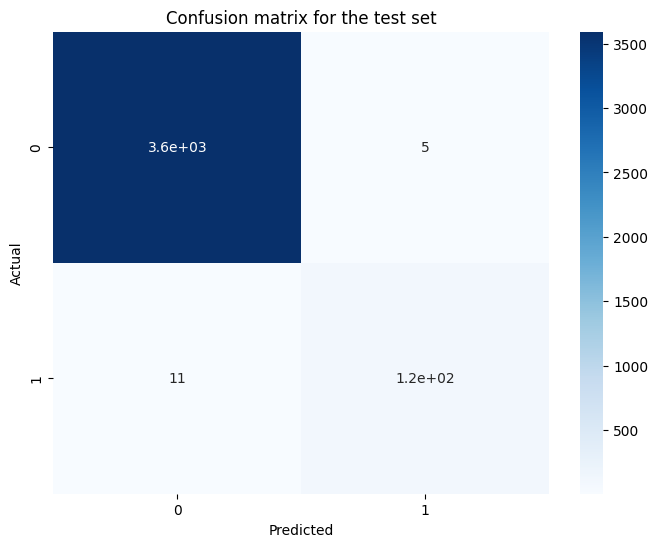

In [32]:
# Confusion matrix test 
cm = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for the test set")
plt.show()

In [33]:
y_test[y_test == 1].sum()

126

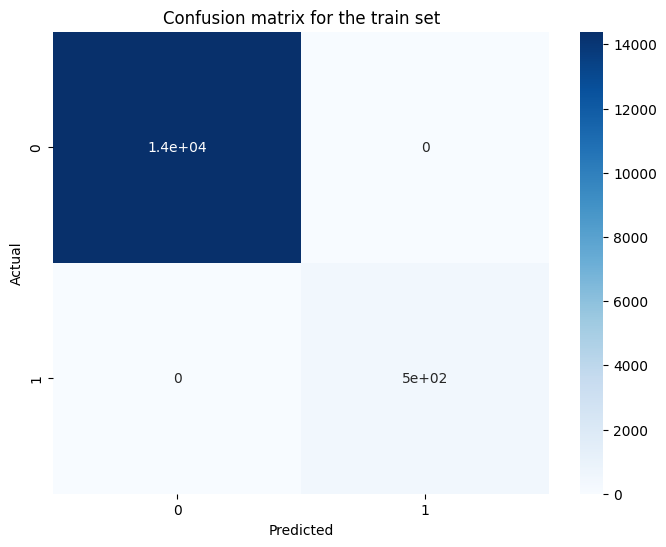

In [34]:
# Confusion matrix train
cm = confusion_matrix(y_true=y_train, y_pred=model.predict(X_train))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for the train set")
plt.show()

In [35]:
print(accuracy_validation)

0.9979635546504687


#### Catching false negatives

In [36]:
#Finding false negatives
def catch_false_negatives(dataset_name: str = "train") -> pd.DataFrame:
    if dataset_name.strip().lower() == "train":
        X_temp = X_train.copy()
        y_temp = y_train
    elif dataset_name.strip().lower() == "test":
        X_temp = X_test.copy()
        y_temp = y_test
    else:
        X_temp = X_validation.copy()
        y_temp = y_validation
    X_temp = X_temp.drop_duplicates()
    X_temp["Class_Pred"] = model.predict(X_temp)
    X_temp["Class"] = y_temp
    
    X_temp["compare_pred_reality"] = (X_temp["Class"] == X_temp["Class_Pred"]).astype(int)
    false_negatives = X_temp[(X_temp["Class"] == 1) & (X_temp["Class_Pred"] == 0)]
    return false_negatives


In [37]:
catch_false_negatives("test")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class_Pred,Class,compare_pred_reality
18344,47826.0,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,...,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,7.580,0,1,0
18045,142280.0,-1.169203,1.863414,-2.515135,5.463681,-0.297971,1.364918,0.759219,-0.118861,-2.293921,...,0.471309,-0.078616,-0.544655,0.014777,-0.240930,-0.781055,324.590,0,1,0
18191,17187.0,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,0.860044,...,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,3.790,0,1,0
18209,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.000,0,1,0
18479,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.870,0,1,0
18474,166004.5,-3.361635,-3.020280,-1.557326,4.460871,5.177663,-3.837895,-2.902029,0.499787,-1.411064,...,1.181965,0.204848,-1.254650,-0.302541,0.378402,0.513549,19.950,0,1,0
18026,17230.0,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,...,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,3.930,0,1,0
18112,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.870,0,1,0
18263,139107.0,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,...,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.470,0,1,0
18246,25095.0,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,...,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,3.120,0,1,0


### Performance of the model on the unused data


In [38]:
unused_data = df.copy().drop(df_preprocesed.index)
perc_unused = round(100*len(unused_data)/len(df), 1)
print(f"The unused data represents {perc_unused}% of the original data.")

The unused data represents 93.5% of the original data.


**Warning** There is no fraudulent transaction in the above dataset. Therefore, we are trying to find out how the model performs on the legit transactions.

In [39]:
unused_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18619,29641.0,-1.238909,0.533243,0.862926,-0.579901,0.416053,-0.684791,1.073846,0.002486,-0.496391,...,-0.229813,-0.703629,0.296307,0.166979,-0.547971,-0.083134,0.032274,0.298697,74.9,0
18620,29642.0,1.022094,-0.140574,-0.012710,1.153069,0.209787,0.634618,0.042555,0.173999,0.110472,...,-0.057352,-0.155511,-0.246672,-0.801966,0.706003,-0.286356,0.018268,0.011103,90.0,0
18621,29642.0,1.305725,0.248199,-0.316069,0.808011,0.369262,-0.166012,0.196203,-0.133798,0.115893,...,-0.055939,-0.162553,-0.285701,-1.010602,0.858530,-0.242774,0.006581,0.008941,23.5,0
18622,29643.0,1.162824,-0.203606,1.265903,0.175545,-1.079738,-0.263563,-0.664427,0.059707,0.383574,...,0.157032,0.647834,-0.037049,0.685820,0.210982,1.072346,-0.028782,0.011228,10.0,0
18623,29643.0,-0.908505,1.161986,1.928416,0.497961,-0.530008,-0.192915,0.096970,0.527777,-0.832962,...,-0.131507,-0.364673,-0.159579,0.574868,0.147281,0.284884,-0.079363,0.001679,0.0,0


In [40]:
print("The score of the model on the unused data is:", model.score(unused_data.drop("Class", axis=1), unused_data.Class))
print("The score of the model on the unused data is:", accuracy_score(y_true=unused_data.Class,y_pred= model.predict(unused_data.drop("Class", axis=1))))

The score of the model on the unused data is: 0.9983545464108075
The score of the model on the unused data is: 0.9983545464108075


# Conclusion

Based on these results we can say that the model is acceptable but can be improved. We remind the readear once again that we have only used a tiny proportion of the original dataset to build our model.

### Variable importance

In [41]:
df_importance = pd.DataFrame()
df_importance["feature_name"] = model.feature_names_in_
df_importance["importance"] = model.feature_importances_
df_importance = df_importance.sort_values(by="importance", ascending=False)
df_importance


,feature_name,importance
14,V14,0.729929
17,V17,0.066415
10,V10,0.043583
4,V4,0.021918
21,V21,0.019493
7,V7,0.012142
29,Amount,0.010840
26,V26,0.010405
13,V13,0.008815
15,V15,0.008452


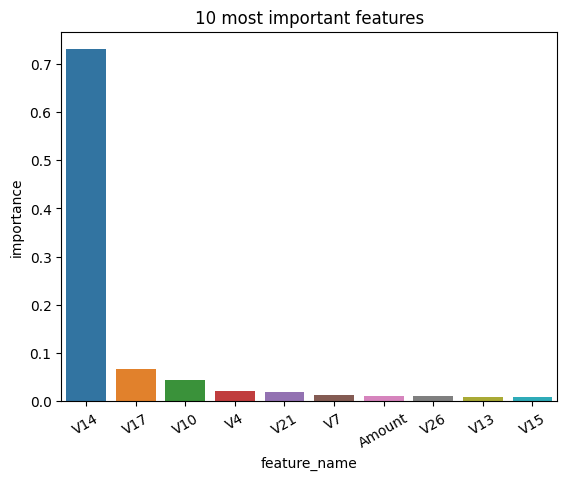

In [42]:
# Displaying the 10 most important features according to the model
sns.barplot(data=df_importance[:10], x="feature_name", y= "importance")
plt.xticks(rotation=30)
plt.title("10 most important features")
plt.show()

**Note:** From this bar chart, we can see the most important variables. The most important one is *V14*.